In [2]:
import numpy as np
import marginal
%matplotlib inline
import matplotlib.pyplot as plt

# Marginal posterior probability estimation (inference in a model with a single frequency)

In [3]:
# Generate some sinusoidal data with Gaussian noise
t = np.arange(10000)/1000 # sampling rate = 1000Hz
# A 2.5 Hz sinusoidal signal plus standard normal noise
data = 3.0*np.sin(2*np.pi*2.5*t) + np.random.normal(size = t.shape[0])

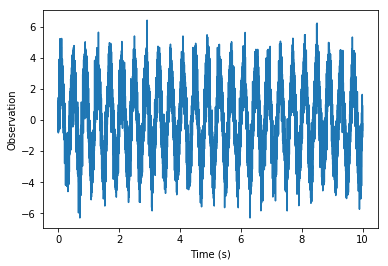

In [4]:
plt.plot(t, data)
plt.xlabel("Time (s)")
plt.ylabel("Observation")

In [5]:
# Make a sinusoidal marginal model
model = marginal.SinusoidMarginal()

In [6]:
# Make a list of frequencies to calculate posterior probabilities for
frequencies = np.arange(1, 20, 1)*0.5
# Perform inference
model.fit(data, t, frequencies)

/media/glia/code_projects/bsaPy/bsaPy/marginal.py:107: RuntimeWarning: overflow encountered in double_scalars
  return (1.0 - (num_model_funcs*mean_squared_projections) / (num_data_points*np.mean(self.y**2))) ** (0.5*(num_model_funcs-num_data_points))


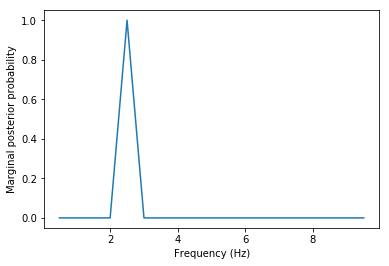

In [7]:
# Plot the posterior probabilities against frequencies
plt.plot(frequencies, model.posterior/np.sum(model.posterior))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Marginal posterior probability")

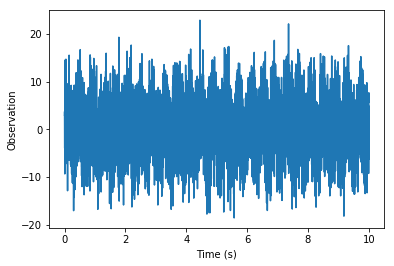

In [10]:
# Increase the noise level in the signal and see what happens
# A 2.5 Hz sinusoidal signal plus normal noise
data = 3.0*np.sin(2*np.pi*2.5*t) + np.random.normal(scale = 5.0, size = t.shape[0])
plt.plot(t, data)
plt.xlabel("Time (s)")
plt.ylabel("Observation")

/media/glia/code_projects/bsaPy/bsaPy/marginal.py:107: RuntimeWarning: overflow encountered in double_scalars
  return (1.0 - (num_model_funcs*mean_squared_projections) / (num_data_points*np.mean(self.y**2))) ** (0.5*(num_model_funcs-num_data_points))


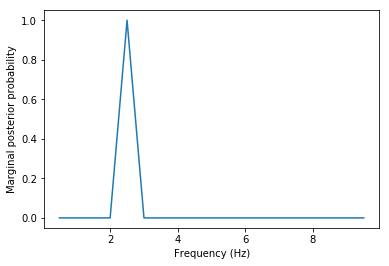

In [11]:
# Perform inference again
model = marginal.SinusoidMarginal()
model.fit(data, t, frequencies)
plt.plot(frequencies, model.posterior/np.sum(model.posterior))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Marginal posterior probability")

/media/glia/code_projects/bsaPy/bsaPy/marginal.py:107: RuntimeWarning: overflow encountered in double_scalars
  return (1.0 - (num_model_funcs*mean_squared_projections) / (num_data_points*np.mean(self.y**2))) ** (0.5*(num_model_funcs-num_data_points))


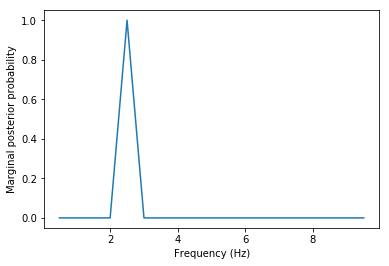

In [12]:
# Get the same results from the general model if sinusoids are explicitly fed in
model = marginal.GeneralMarginal([marginal.sin, marginal.cos])
model.fit(data, t, frequencies)
plt.plot(frequencies, model.posterior/np.sum(model.posterior))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Marginal posterior probability")

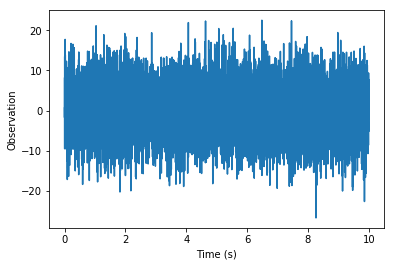

In [20]:
# Generate dampened sinusoidal data with a phase shift - frequency = 4Hz
data = 3.0*np.sin(2*np.pi*4*t + 0.65*np.pi)*np.exp(-t) + np.random.normal(scale = 6.0, size = t.shape[0])
plt.plot(t, data)
plt.xlabel("Time (s)")
plt.ylabel("Observation")

In [21]:
# Fit this with model functions (sin + cosine) that have the exponential decay term included
def decay_sin(freq, t):
    return np.sin(2*np.pi*freq*t)*np.exp(-t)
def decay_cos(freq, t):
    return np.cos(2*np.pi*freq*t)*np.exp(-t)

In [22]:
# Feed the model functions into the general marginal model
model = marginal.GeneralMarginal([decay_sin, decay_cos])
model.fit(data, t, frequencies)

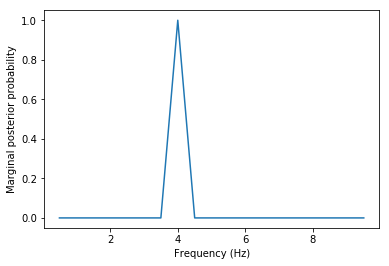

In [23]:
plt.plot(frequencies, model.posterior/np.sum(model.posterior))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Marginal posterior probability")

Picks out the right frequency even with exponential decay and a lot of noise!